# Brevdo method

In [9]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
import cmocean
from benchmark_demo.utilstf import *
from benchmark_demo.SignalBank import SignalBank
from benchmark_demo.Benchmark import Benchmark
from methods.method_brevdo import NewMethod

In [10]:
np.random.seed(0) 
# signal parameters
SNRin = 20
N = 2**10
# Nsub=N//2
sbank = SignalBank(N=N, return_signal=True)
tmin = sbank.tmin
tmax = sbank.tmax
s = sbank.signal_mc_damped_cos()
# s = sbank.signal_mc_crossing_chirps()
# s = sbank.signal_mc_synthetic_mixture_5()

noise = np.random.randn(N,)
signal = Benchmark.sigmerge(s,noise,SNRin)

In [11]:

Nfft = 2*N
g,_ = get_round_window(Nfft)
S, F= get_spectrogram(s, window = g)
F = F[0:N+1]

methodml = NewMethod()
funa = methodml.method
# xr = brevdo_method(x, Ncomp, use_sst, Pnei, M, L)
Pnei = 70
M = 2*N
L = (M/4)**0.5

# signal_output = funa(signal,[],True,Pnei,M,L)
signal_output = funa(signal,)
qrf = Benchmark.snr_comparison(s,signal_output,tmin=tmin,tmax=tmax)
qrf

22.472369185755365

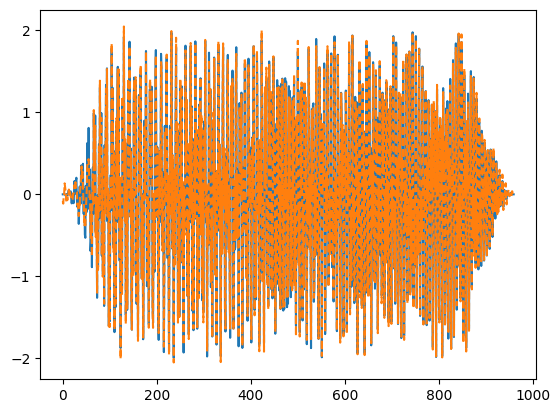

In [12]:
S_output, F_output = get_spectrogram(signal_output, window = g)
F_output = F_output[0:N+1]
plt.figure()
plt.plot(s[tmin:tmax])
plt.plot(signal_output[tmin:tmax],'--')

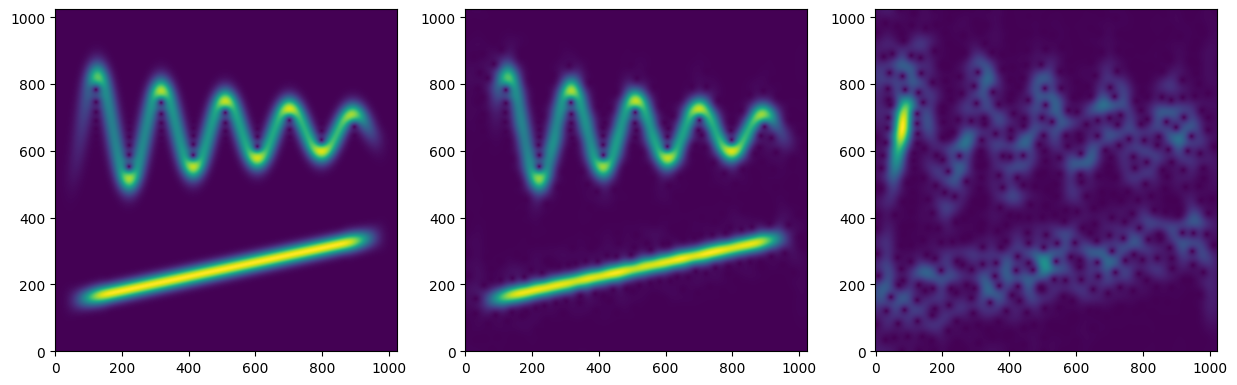

In [13]:
fig, ax = plt.subplots(1,3,figsize = (15,5))
ax[0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
ax[1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)
ax[2].imshow(abs(F_output-F), origin='lower')#, cmap=cmocean.cm.deep)
plt.show()


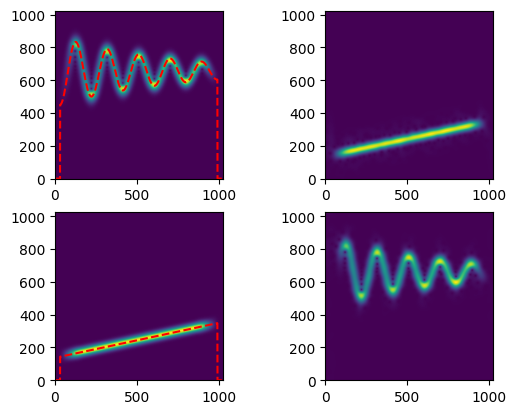

In [14]:
# signal_output = funa(signal,[],True,Pnei,M,L,return_comps)
signal_output = funa(signal,[],[],[],[],[],True)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]

    S_output, F_output = get_spectrogram(signal_output[i], window = g)
    F_output = F_output[0:N+1]

    
    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,0].plot(signal.instf[i]*Nfft,'--r')
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)

plt.show()

[1, 0]


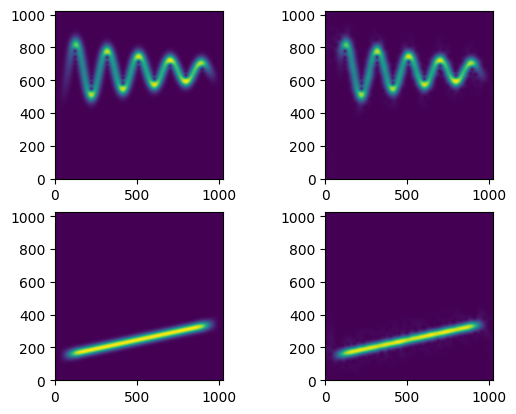

In [15]:
from benchmark_demo.perf_metrics import order_components, mse

order = order_components(signal_output,signal.comps)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    F_output = F_output[0:N+1]

    axs[i,0].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].imshow(abs(F_output), origin='lower')#, cmap=cmocean.cm.deep)


print(order)

2


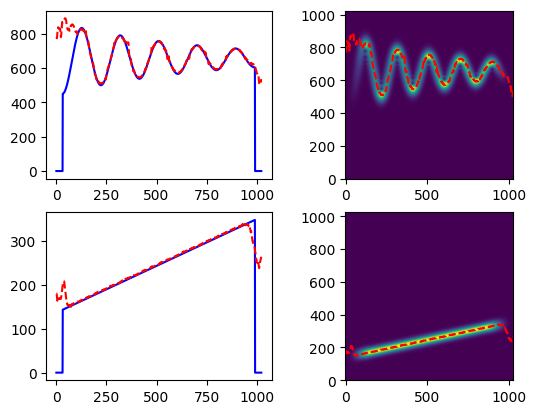

In [16]:
signal_output = funa(signal,[],[],[],[],[],[],True)

order = order_components(signal_output,signal.instf, minormax = 'min', metric = mse)

fig, axs = plt.subplots(signal.total_comps,2)

for i in range(signal.total_comps):
    
    S, F = get_spectrogram(signal.comps[i], window = g)
    F = F[0:N+1]
    # S_output, F_output = get_spectrogram(signal_output[order[i]], window = g)
    # F_output = F_output[0:N+1]

    axs[i,0].plot(signal.instf[i]*Nfft,'b')
    axs[i,0].plot(signal_output[order[i]]*Nfft,'r--')
    axs[i,1].imshow(abs(F), origin='lower')#, cmap=cmocean.cm.deep)
    axs[i,1].plot(signal_output[order[i]]*Nfft,'r--')

print(len(signal.instf))